Analysis of this data:
1. Cloudiness appears to be relatively unrrelated to latitude. 
2. There is a strong relationship between temperature and latitude. Cities closer to the equator have a higher temperature, and temperature decreases in cities farther away from the equator.
3. Wind speed also appears to be relatively unrelated to latitude.
4. One limitation of this data is that it is calling for data from cities, which means that there will be more data available from areas with more cities. This limitation is noticeable in the fact that there is no data below -80 degrees latitude. Similarly, there may be more data from the northern hemisphere because almost 2/3 of the world's land mass is in the northern hemisphere. This may skew our observations into thinking that there are trends that may not actually exist. 

In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from config import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

Perform API calls

In [4]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = api_keys
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [5]:
#Create empty lists to hold data
weather = []
cities_list = []

#Counters
count_record = 0

#Loop and pull data on each city
for city in cities:
    count_record += 1
    print(f"Record processing for {count_record} for the city: {city}")
    response = requests.get(query_url + city).json()
    city_id = response.get("id")
    
    if response.get("id"):
        print(f"Record found for: {city} and city id: {city_id}")
        weather.append(response)
        cities_list.append(city)
        
    else:
        print(f"No data for this city")

Record processing for 1 for the city: avarua
Record found for: avarua and city id: 4035715
Record processing for 2 for the city: chake chake
Record found for: chake chake and city id: 160677
Record processing for 3 for the city: butaritari
Record found for: butaritari and city id: 2110227
Record processing for 4 for the city: hobart
Record found for: hobart and city id: 2163355
Record processing for 5 for the city: carnarvon
Record found for: carnarvon and city id: 1014034
Record processing for 6 for the city: barrow
Record found for: barrow and city id: 3833859
Record processing for 7 for the city: araguatins
No data for this city
Record processing for 8 for the city: kapaa
Record found for: kapaa and city id: 5848280
Record processing for 9 for the city: ushuaia
Record found for: ushuaia and city id: 3833367
Record processing for 10 for the city: tuy hoa
Record found for: tuy hoa and city id: 1563281
Record processing for 11 for the city: cidreira
Record found for: cidreira and city 

Record found for: souillac and city id: 3026644
Record processing for 90 for the city: tadine
Record found for: tadine and city id: 2138285
Record processing for 91 for the city: katsuura
Record found for: katsuura and city id: 1865309
Record processing for 92 for the city: milledgeville
Record found for: milledgeville and city id: 4209448
Record processing for 93 for the city: san patricio
Record found for: san patricio and city id: 3437029
Record processing for 94 for the city: nyurba
Record found for: nyurba and city id: 2018735
Record processing for 95 for the city: port elizabeth
Record found for: port elizabeth and city id: 4501427
Record processing for 96 for the city: iracoubo
Record found for: iracoubo and city id: 3381428
Record processing for 97 for the city: asfi
No data for this city
Record processing for 98 for the city: newport
Record found for: newport and city id: 2641598
Record processing for 99 for the city: lazaro cardenas
Record found for: lazaro cardenas and city 

Record found for: talnakh and city id: 1490256
Record processing for 177 for the city: menongue
Record found for: menongue and city id: 3347353
Record processing for 178 for the city: bar harbor
Record found for: bar harbor and city id: 4957320
Record processing for 179 for the city: georgiyevka
Record found for: georgiyevka and city id: 565857
Record processing for 180 for the city: kununurra
Record found for: kununurra and city id: 2068110
Record processing for 181 for the city: the pas
Record found for: the pas and city id: 6164499
Record processing for 182 for the city: saint-augustin
Record found for: saint-augustin and city id: 3031582
Record processing for 183 for the city: broome
Record found for: broome and city id: 2656067
Record processing for 184 for the city: bredasdorp
Record found for: bredasdorp and city id: 1015776
Record processing for 185 for the city: kahului
Record found for: kahului and city id: 5847411
Record processing for 186 for the city: tokat
Record found fo

Record found for: muros and city id: 3115824
Record processing for 264 for the city: floro
Record found for: floro and city id: 3156980
Record processing for 265 for the city: coahuayana
Record found for: coahuayana and city id: 3981460
Record processing for 266 for the city: auki
Record found for: auki and city id: 2339937
Record processing for 267 for the city: jackson
Record found for: jackson and city id: 4632595
Record processing for 268 for the city: qui nhon
No data for this city
Record processing for 269 for the city: aguimes
Record found for: aguimes and city id: 2522325
Record processing for 270 for the city: medvezhyegorsk
Record found for: medvezhyegorsk and city id: 527888
Record processing for 271 for the city: kodiak
Record found for: kodiak and city id: 4407665
Record processing for 272 for the city: sao miguel do araguaia
Record found for: sao miguel do araguaia and city id: 3448455
Record processing for 273 for the city: torbay
Record found for: torbay and city id: 61

Record found for: tiarei and city id: 4033356
Record processing for 350 for the city: prabumulih
Record found for: prabumulih and city id: 1631393
Record processing for 351 for the city: kenora
Record found for: kenora and city id: 5991056
Record processing for 352 for the city: salamiyah
Record found for: salamiyah and city id: 164947
Record processing for 353 for the city: gigmoto
Record found for: gigmoto and city id: 1712961
Record processing for 354 for the city: sfantu gheorghe
Record found for: sfantu gheorghe and city id: 667306
Record processing for 355 for the city: verkhnyaya inta
Record found for: verkhnyaya inta and city id: 1487332
Record processing for 356 for the city: barentsburg
No data for this city
Record processing for 357 for the city: centralia
Record found for: centralia and city id: 4380848
Record processing for 358 for the city: tumba
Record found for: tumba and city id: 2667094
Record processing for 359 for the city: zhongshu
Record found for: zhongshu and ci

Record found for: vila velha and city id: 6320062
Record processing for 437 for the city: marsh harbour
Record found for: marsh harbour and city id: 3571913
Record processing for 438 for the city: baruun-urt
Record found for: baruun-urt and city id: 2032614
Record processing for 439 for the city: zheleznodorozhnyy
Record found for: zheleznodorozhnyy and city id: 463355
Record processing for 440 for the city: makinsk
Record found for: makinsk and city id: 1521230
Record processing for 441 for the city: mayor pablo lagerenza
Record found for: mayor pablo lagerenza and city id: 3867427
Record processing for 442 for the city: tavda
Record found for: tavda and city id: 1489962
Record processing for 443 for the city: council bluffs
Record found for: council bluffs and city id: 4852832
Record processing for 444 for the city: narsaq
Record found for: narsaq and city id: 3421719
Record processing for 445 for the city: baiquan
Record found for: baiquan and city id: 2038541
Record processing for 

Record found for: nizwa and city id: 286987
Record processing for 523 for the city: leningradskiy
Record found for: leningradskiy and city id: 2123814
Record processing for 524 for the city: atar
Record found for: atar and city id: 2381334
Record processing for 525 for the city: hamilton
Record found for: hamilton and city id: 5969785
Record processing for 526 for the city: mount gambier
Record found for: mount gambier and city id: 2156643
Record processing for 527 for the city: belize
No data for this city
Record processing for 528 for the city: ahipara
Record found for: ahipara and city id: 2194098
Record processing for 529 for the city: srednekolymsk
Record found for: srednekolymsk and city id: 2121025
Record processing for 530 for the city: zambezi
Record found for: zambezi and city id: 895953
Record processing for 531 for the city: broadstairs
Record found for: broadstairs and city id: 2654635
Record processing for 532 for the city: lively
Record found for: lively and city id: 472

In [6]:
len(weather)

538

In [7]:
#Create variables for each of the parameters we want
country_city = [data.get("sys").get("country") for data in weather]
lat_city = [data.get("coord").get("lat") for data in weather]
lng_city = [data.get("coord").get("lng") for data in weather]
wind_city = [data.get("wind").get("speed") for data in weather]
clouds_city = [data.get("clouds").get("all") for data in weather]
hum_city = [data.get("main").get("humidity") for data in weather]
temp_city = [data.get("main").get("temp") for data in weather]

In [9]:
#Append the list
weather_data = pd.DataFrame({"City": cities_list,
                "Country": country_city,
                "Latitude": lat_city,
                "Longitutde": lng_city,
                "Wind Speed": wind_city,
                "Cloudiness": clouds_city,
                "Humidity": hum_city,
                "Temperature": temp_city})

weather_data.head()

,City,Country,Latitude,Longitutde,Wind Speed,Cloudiness,Humidity,Temperature
0,avarua,CK,-21.21,None,14.99,75,56,73.40
1,chake chake,TZ,-5.25,None,11.05,88,98,77.49
2,butaritari,KI,3.07,None,5.23,76,100,84.33
3,hobart,AU,-42.88,None,4.70,40,58,59.00
4,carnarvon,ZA,-30.97,None,10.49,12,23,57.69


In [10]:
#Create an output file
weather_data.to_csv("weather_data.csv", index=False)

Temperature (F) vs. Latitude

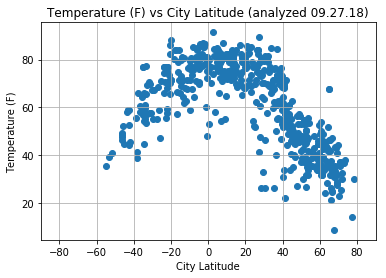

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature"])

plt.title("Temperature (F) vs City Latitude (analyzed 09.27.18)")
plt.ylabel("Temperature (F)")
plt.xlabel("City Latitude")
plt.xlim(-90, 90)
plt.grid()

plt.savefig("Temp vs. Lat.png")

Humidity (%) vs. Latitude

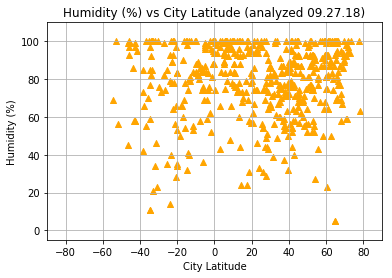

In [12]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="^", color="orange")

plt.title("Humidity (%) vs City Latitude (analyzed 09.27.18)")
plt.ylabel("Humidity (%)")
plt.xlabel("City Latitude")
plt.xlim(-90, 90)
plt.ylim(-5, 110)
plt.grid()

plt.savefig("Humid vs. Lat.png")

Cloudiness (%) vs. Latitude

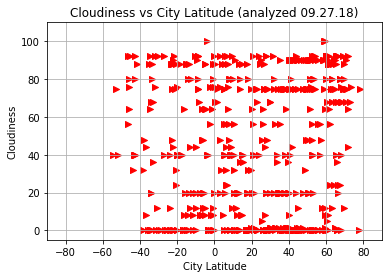

In [13]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker=">", color="red")

plt.title("Cloudiness vs City Latitude (analyzed 09.27.18)")
plt.ylabel("Cloudiness")
plt.xlabel("City Latitude")
plt.xlim(-90, 90)
plt.ylim(-5, 110)
plt.grid()

plt.savefig("Cloud vs. Lat.png")

Wind Speed (mph) vs. Latitude

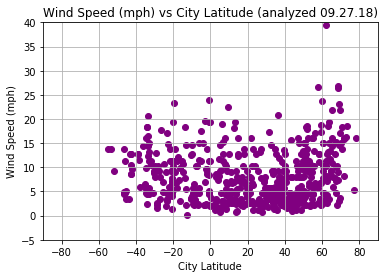

In [38]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", color="purple")

plt.title("Wind Speed (mph) vs City Latitude (analyzed 09.27.18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.xlim(-90, 90)
plt.ylim(-5, 40)
plt.grid()

plt.savefig("Wind vs. Lat.png")